In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import pickle

In [2]:
data = pd.read_csv('advertising.csv')

In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,6/3/2016 3:36,0


# Checking

In [4]:
data.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Gender                       3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

# Dropping

In [5]:
data = data.dropna()
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Index reseting

In [6]:
data = data.reset_index()
data = data.drop(['index'], axis=1)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
948,64.20,27,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,Male,Isle of Man,2/11/2016 23:45,0
949,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2/11/2016 21:49,1
950,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,4/22/2016 2:07,1
951,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,3/24/2016 2:35,0


# Encoding

In [7]:
data.loc[data['Gender'] == 'Female', 'Gender'] = 0
data.loc[data['Gender'] == 'Male', 'Gender'] = 1
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


# Timestamp decomposition

In [8]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['year'] = data['Timestamp'].dt.year

data['Month'] = data['Timestamp'].dt.month

data['Day'] = data['Timestamp'].dt.day

data['Day Of Week'] = data['Timestamp'].dt.dayofweek

data['Hour'] = data['Timestamp'].dt.hour

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,year,Month,Day,Day Of Week,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0,2016,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0,2016,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0,2016,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0,2016,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0,2016,6,3,4,3


# 

# Columns Check

In [9]:
data[['Ad Topic Line', 'City', 'Country']].describe(include=['O'])

,Ad Topic Line,City,Country
count,953,953,953
unique,953,926,235
top,Cloned 5thgeneration orchestration,Williamsport,Czech Republic
freq,1,3,9


In [10]:
#Nombre des instance pour chaque Pays
pd.crosstab(index = data['Country'], columns = 'Count').sort_values('Count', ascending=False).head(20)

col_0,Count
Country,
Czech Republic,9
Afghanistan,8
Turkey,8
France,8
Peru,8
Australia,8
South Africa,8
Micronesia,8
Taiwan,7


# Columns dropping

In [11]:
data = data.drop(['Ad Topic Line', 'City','year','Day','Timestamp'], axis=1)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Clicked on Ad,Month,Day Of Week,Hour
0,68.95,35,61833.90,256.09,0,Tunisia,0,3,6,0
1,80.23,31,68441.85,193.77,1,Nauru,0,4,0,1
2,69.47,26,59785.94,236.50,0,San Marino,0,3,6,20
3,74.15,29,54806.18,245.89,1,Italy,0,1,6,2
4,68.37,35,73889.99,225.58,0,Iceland,0,6,4,3


# Deleting Country column

In [12]:
#On vas supprimer country mais on vas le stocker pour l'utiliser apres
Country_Column = data.pop('Country')
Country_Column

0                     Tunisia
1                       Nauru
2                  San Marino
3                       Italy
4                     Iceland
                ...          
948               Isle of Man
949                   Lebanon
950    Bosnia and Herzegovina
951                 Guatemala
952                    Brazil
Name: Country, Length: 953, dtype: object

# Data Visualisation


<Axes: xlabel='count', ylabel='Gender'>

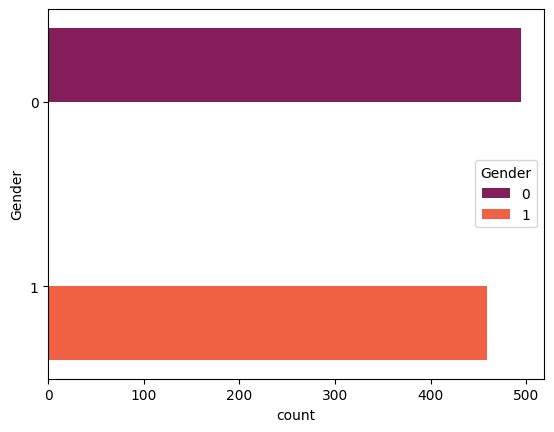

In [13]:
sb.countplot(data=data, y="Gender",hue="Gender", saturation = 1, palette="rocket")

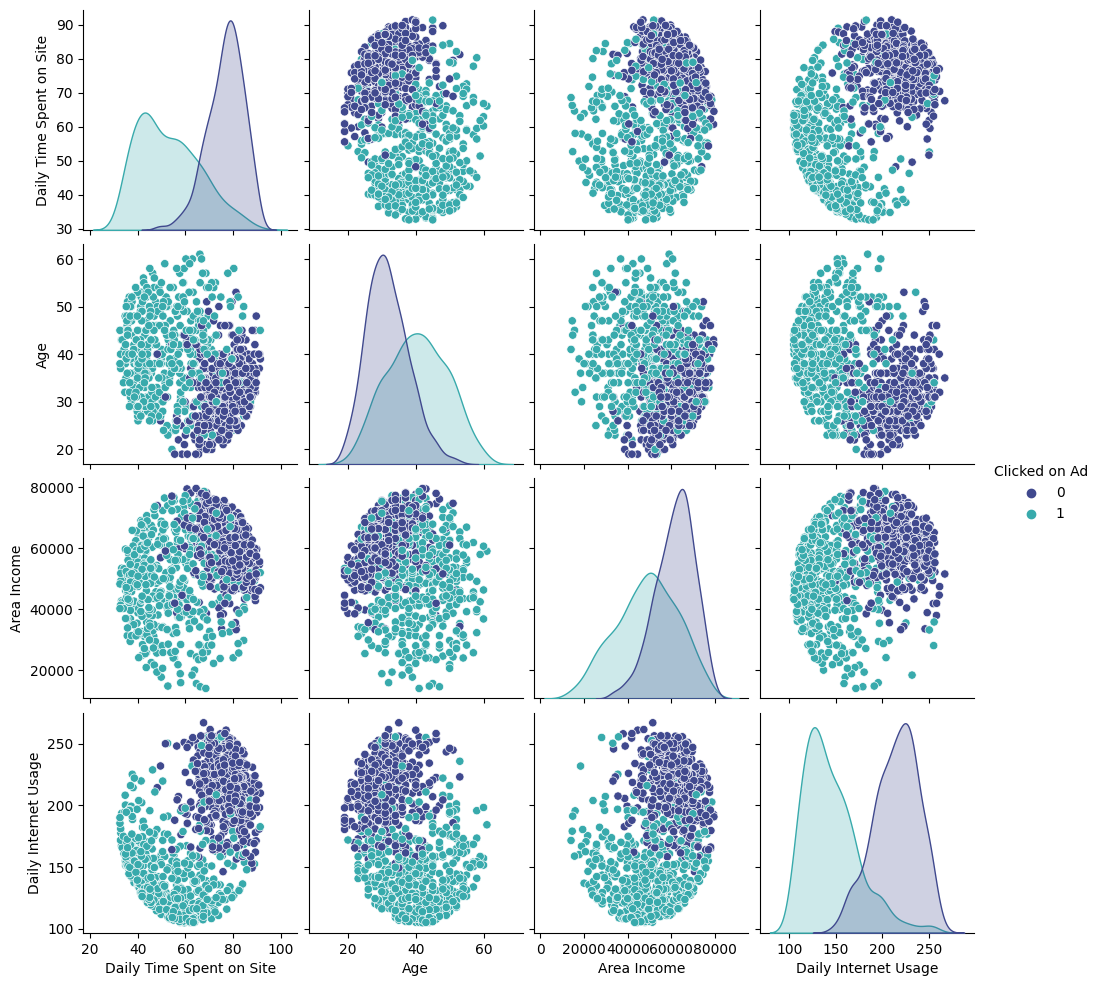

In [14]:
pair_plot_data = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']]
sb.pairplot(pair_plot_data,hue='Clicked on Ad', palette='mako')

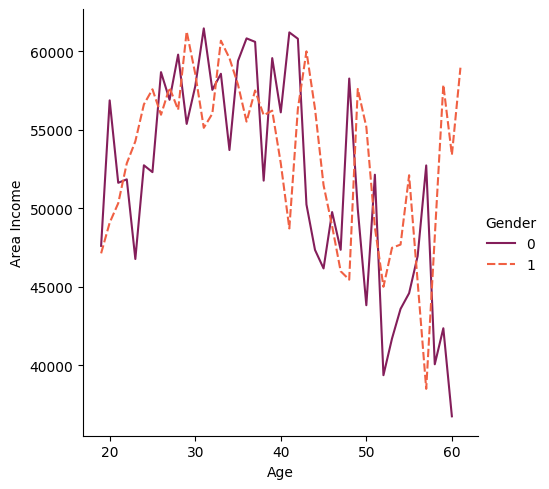

In [15]:
sb.relplot(
    data=data, kind="line",
    x="Age", y="Area Income", errorbar=None, hue='Gender',style='Gender', palette='rocket'
)

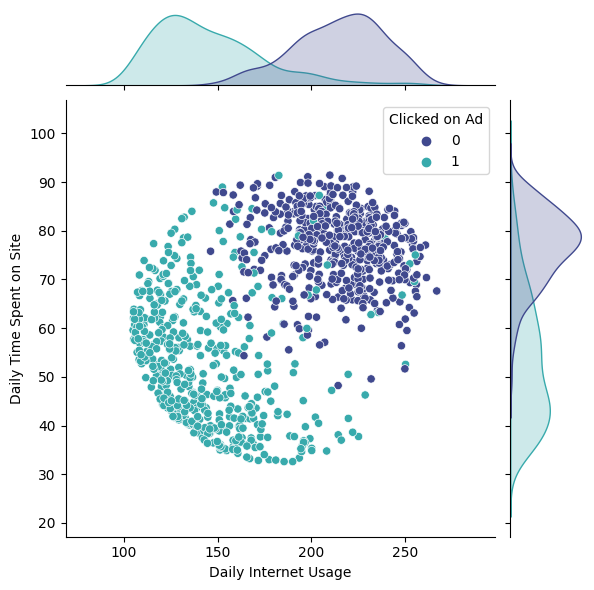

In [16]:
sb.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site', data=data, hue="Clicked on Ad", palette='mako')

<Axes: xlabel='Month', ylabel='Clicked on Ad'>

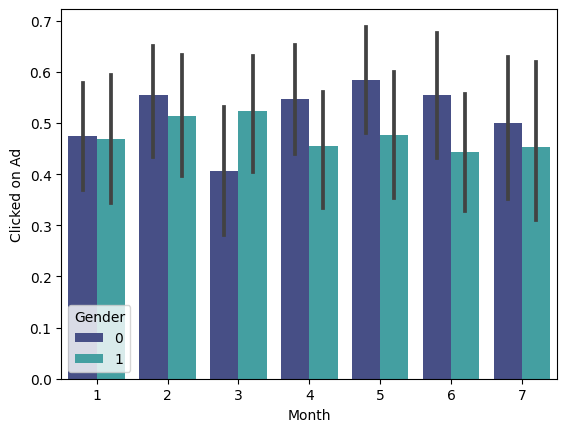

In [17]:
sb.barplot(data, x='Month', y='Clicked on Ad',hue='Gender', palette='mako',saturation=0.80)

<Axes: xlabel='Day Of Week', ylabel='Clicked on Ad'>

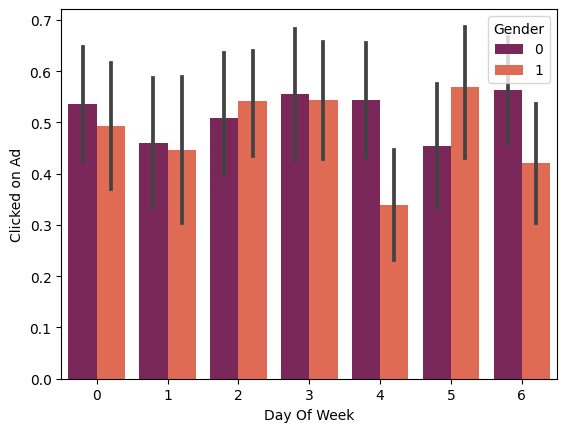

In [18]:
sb.barplot(data, x='Day Of Week', y='Clicked on Ad', hue='Gender', palette='rocket',saturation=0.80)

# Feature Selection

Crating dataset without Country Column

In [19]:
data_without_country = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Gender','Month'
                             ,'Day Of Week','Hour','Clicked on Ad']]
data_without_country.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Month,Day Of Week,Hour,Clicked on Ad
0,68.95,35,61833.90,256.09,0,3,6,0,0
1,80.23,31,68441.85,193.77,1,4,0,1,0
2,69.47,26,59785.94,236.50,0,3,6,20,0
3,74.15,29,54806.18,245.89,1,1,6,2,0
4,68.37,35,73889.99,225.58,0,6,4,3,0


Creating data with Country Column

In [20]:
data_with_country = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Gender','Month',
                                                                          'Day Of Week','Hour','Clicked on Ad']]
data_with_country.insert(8,'Country',Country_Column) #adding Country column

After adding the column we need to do the Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_with_country = data_with_country.reset_index(drop=True) #afin d'éviter l'indexation en chaîne
data_with_country[data_with_country.columns[8]] = le.fit_transform(data_with_country['Country'])#converting the string varibales to numerics
data_with_country.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Month,Day Of Week,Hour,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,0,3,6,0,213,0
1,80.23,31,68441.85,193.77,1,4,0,1,145,0
2,69.47,26,59785.94,236.50,0,3,6,20,182,0
3,74.15,29,54806.18,245.89,1,1,6,2,101,0
4,68.37,35,73889.99,225.58,0,6,4,3,94,0


# Training and Test

Specifying libraries

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Setting up the data for Training

In [23]:
X_WC = data_with_country[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Gender','Country',
                                                                                      'Month','Day Of Week','Hour']]
y_WC = data_with_country['Clicked on Ad']

X_WoC = data_without_country[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Gender','Month',
                                                                                              'Day Of Week','Hour']]
y_WoC = data_without_country['Clicked on Ad']

# Training

In [24]:
X_WC_train, X_WC_test, y_WC_train, y_WC_test = train_test_split(X_WC, y_WC, test_size=0.33, random_state=0)

X_WoC_train, X_WoC_test, y_WoC_train, y_WoC_test = train_test_split(X_WoC, y_WoC, test_size=0.33, random_state=0)

# Using Sklearn Logistic Regression

Fiting

In [25]:
result_WC_LR = LogisticRegression(C= 0.5, dual= False, fit_intercept= True, intercept_scaling= 0.5, 
                                  max_iter= 100, multi_class= 'auto', penalty= 'l2', solver= 'newton-cg')
result_WC_LR.fit(X_WC_train,y_WC_train)

result_WoC_LR =LogisticRegression(C= 0.5, dual= False, fit_intercept= True, intercept_scaling= 0.5, 
                                  max_iter= 100, multi_class= 'auto', penalty= 'l2', solver= 'newton-cg')
result_WoC_LR.fit(X_WoC_train,y_WoC_train)

C:\Users\Hatim\anaconda3\envs\ML\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hatim\anaconda3\envs\ML\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hatim\anaconda3\envs\ML\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Hatim\anaconda3\envs\ML\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hatim\anaconda3\envs\ML\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('

LogisticRegression(C=0.5, intercept_scaling=0.5, solver='newton-cg')

# Test 

In [26]:
y_WC_predicte_LR = result_WC_LR.predict(X_WC_test)

y_WoC_predicte_LR = result_WoC_LR.predict(X_WoC_test)

In [28]:
#saving model to disk
pickle.dump(result_WC_LR, open('model.pkl','wb'))

Accuracy Test

In [29]:
print('Logistic regression accuracy pour dataset avec Country:', accuracy_score(y_WC_predicte_LR, y_WC_test))

print('\nLogistic regression accuracy pour dataset sans Country:', accuracy_score(y_WoC_predicte_LR,y_WoC_test))

print('\nConfustion matrix score du data set avec Country column: \n', metrics.confusion_matrix(y_WC_test, y_WC_predicte_LR))

print('\nConfustion matrix score du data set sans Country column: \n',metrics.confusion_matrix(y_WoC_test, y_WoC_predicte_LR))

Logistic regression accuracy pour dataset avec Country: 0.9714285714285714

Logistic regression accuracy pour dataset sans Country: 0.9714285714285714

Confustion matrix score du data set avec Country column: 
 [[161   3]
 [  6 145]]

Confustion matrix score du data set sans Country column: 
 [[161   3]
 [  6 145]]


# Using sklearn DecisionTree Classifier

Fiting

In [30]:
result_WC_DT = DecisionTreeClassifier(criterion= 'entropy',max_depth= 10,max_features= 0.5, min_samples_leaf= 1, 
                                      min_samples_split= 10, random_state= 1)
result_WC_DT.fit(X_WC_train,y_WC_train)

result_WoC_DT = DecisionTreeClassifier(criterion= 'entropy',max_depth= 10,max_features= 0.5, min_samples_leaf= 1, 
                                       min_samples_split= 10, random_state= 1)
result_WoC_DT.fit(X_WoC_train,y_WoC_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_split=10, random_state=1)

# Test

In [31]:
y_WC_predicte_DT = result_WC_DT.predict(X_WC_test)

y_WoC_predicte_DT = result_WoC_DT.predict(X_WoC_test)

Accuracy Test

In [31]:
print('DecisionTree Classifier accuracy pour dataset avec Country:', accuracy_score(y_WC_predicte_DT, y_WC_test))

print('\nDecisionTree Classifier accuracy pour dataset sans Country:', accuracy_score(y_WoC_predicte_DT,y_WoC_test))

print('\nConfustion matrix score du data set avec Country column: \n', metrics.confusion_matrix(y_WC_test, y_WC_predicte_DT))

print('\nConfustion matrix score du data set sans Country column: \n',metrics.confusion_matrix(y_WoC_test, y_WoC_predicte_DT))

DecisionTree Classifier accuracy pour dataset avec Country: 0.9396825396825397

DecisionTree Classifier accuracy pour dataset sans Country: 0.9428571428571428

Confustion matrix score du data set avec Country column: 
 [[157   7]
 [ 12 139]]

Confustion matrix score du data set sans Country column: 
 [[158   6]
 [ 12 139]]


# Using sklearn K-Nearest Neighbor

Fiting

In [32]:
result_WC_KNN = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, metric= 'manhattan', n_jobs= -1, n_neighbors= 10, 
                                     p= 0.5, weights= 'distance')
result_WC_KNN.fit(X_WC_train,y_WC_train)

result_WoC_KNN = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, metric= 'manhattan', n_jobs= -1, n_neighbors= 10, 
                                      p= 0.5, weights= 'distance')
result_WoC_KNN.fit(X_WoC_train,y_WoC_train)

KNeighborsClassifier(leaf_size=1, metric='manhattan', n_jobs=-1, n_neighbors=10,
                     p=0.5, weights='distance')

# Test

In [33]:
y_WC_predicte_KNN = result_WC_KNN.predict(X_WC_test)

y_WoC_predicte_KNN = result_WoC_KNN.predict(X_WoC_test)

Accuracy Test

In [34]:
print('K-Nearest Neighbor accuracy pour dataset avec Country:', accuracy_score(y_WC_predicte_KNN, y_WC_test))

print('\nK-Nearest Neighbor accuracy pour dataset sans Country:', accuracy_score(y_WoC_predicte_KNN,y_WoC_test))

print('\nConfustion matrix score du data set avec Country column: \n', metrics.confusion_matrix(y_WC_test, y_WC_predicte_KNN))

print('\nConfustion matrix score du data set sans Country column: \n',metrics.confusion_matrix(y_WoC_test, y_WoC_predicte_KNN))

DecisionTree Classifier accuracy pour dataset avec Country: 0.8158730158730159

DecisionTree Classifier accuracy pour dataset sans Country: 0.7968253968253968

Confustion matrix score du data set avec Country column: 
 [[139  25]
 [ 33 118]]

Confustion matrix score du data set sans Country column: 
 [[136  28]
 [ 36 115]]
